## Data Understanding and Exploratory Data Analysis

### Part 1: Data Loading and Understanding

#### 1.1 Import necessary libraries

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from DeepRetail.exploratory.eda import create_features
import seaborn as sns

It's a good practice to import all necessary libraries at the beginning of your notebook.

#### 1.2 Load the data

In [3]:
# Load the main datasets
df = pd.read_csv('/home/filtheo/Data_folder/M5/Accuracy/sales_train_evaluation.csv')
calendar =  pd.read_csv('/home/filtheo/Data_folder/M5/Accuracy/calendar.csv')
prices = pd.read_csv('/home/filtheo/Data_folder/M5/Accuracy/sell_prices.csv')

Note: Always use relative paths or environment variables for file paths in production code.

#### 1.3 Understand the data structure

In [4]:
# Display the first few rows of each dataset
print("Sales data:")
df.head()

Sales data:


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [5]:
print("\nPrices data:")
prices.head()


Prices data:


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [6]:
print("\nCalendar data:")
calendar.head()


Calendar data:


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
# Get basic information about the datasets
print("\nSales data info:")
print(df.info())
print("\nCalendar data info:")
print(calendar.info())
print("\nPrices data info:")
print(prices.info())


Sales data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB
None

Calendar data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: in

Note: Understanding the structure of your data is crucial before proceeding with analysis.

#### 1.4 Check for missing values

In [8]:
# Check for missing values in each dataset
print("Missing values in sales data:")
print(df.isnull().sum().sum())
print("\nMissing values in calendar data:")
print(calendar.isnull().sum().sum())
print("\nMissing values in prices data:")
print(prices.isnull().sum().sum())

Missing values in sales data:
0

Missing values in calendar data:
7542

Missing values in prices data:
0


Note: Identifying missing values early helps in deciding on appropriate data cleaning strategies.

#### 1.5 Understand basic data information 


In [9]:
lowest_price = min(prices['sell_price'])
highest_price = max(prices['sell_price'])

print(f'Prices ranging from {lowest_price}$ to {highest_price}$')

Prices ranging from 0.01$ to 107.32$


In [10]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [11]:
# Checking the total number of dates

# keeping date columns only
days_only = df.iloc[:,6:].columns
total_days = len(days_only)
total_years = total_years = total_days/365
total_weeks = total_years*52
total_months = total_years*30

print(f'We have {round(total_days,3)} total days')
print(f'We have {round(total_years,2)} total years')
print(f'We have {round(total_weeks,2)} total weeks')
print(f'We have {round(total_months,2)} total months')

We have 1941 total days
We have 5.32 total years
We have 276.53 total weeks
We have 159.53 total months


In [12]:
first_date = calendar['date'].values[0]
last_date = calendar['date'].values[-1]

print(f'Sales Information ranges from {first_date} to {last_date}')

Sales Information ranges from 2011-01-29T00:00:00.000000000 to 2016-06-19T00:00:00.000000000


Note: Proper data types, especially for date columns, are essential for time series analysis.

### Part 2: Exploratory Data Analysis (EDA)

#### 2.1 Analyze Overall Sales Patterns


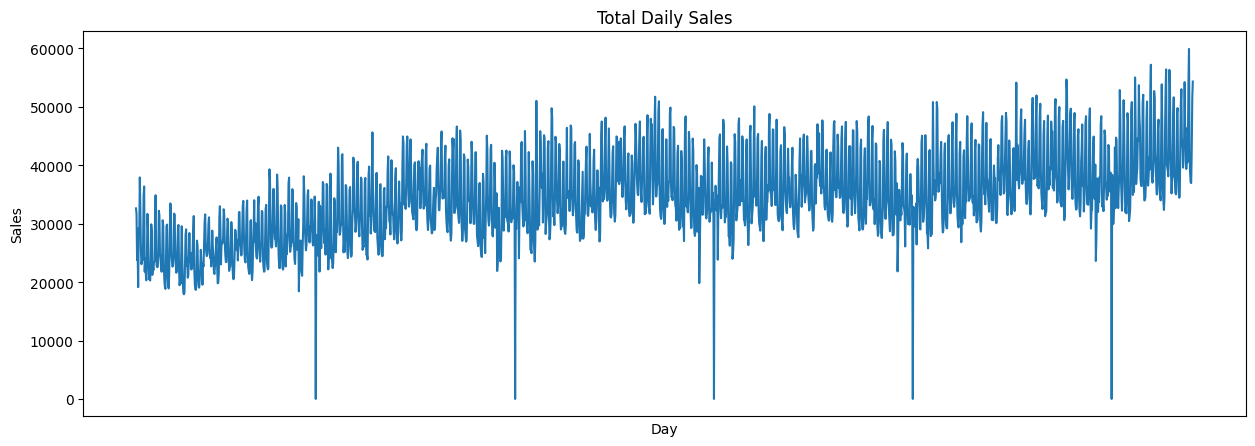

In [13]:
# Calculate total sales per day
daily_sales = df.iloc[:, 6:].sum()

# Plot daily sales
plt.figure(figsize=(15, 5))
plt.plot(daily_sales)
plt.title('Total Daily Sales')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.xticks([])
plt.show()

This plot shows the overall daily sales trend across all items and stores. 
It helps identify any general patterns, seasonality, or unusual spikes in sales.

#### 2.2 Analyze sales per item

In [35]:
# Prepare data for item-level analysis
dates = calendar[['d','date']]
dates = dates.iloc[:total_days]
dates_only = pd.to_datetime(dates['date'].values)

In [36]:
bottom_level = df.drop(['dept_id','cat_id','store_id','state_id','item_id'], axis=1).set_index('id')
bottom_level.columns = dates_only


In [18]:
import math
# Editting the function a bit
# A function to plot multiple series
def viz_series(vals, dates, total_to_vis, row_to_vis, ticks=False, total_ticks=10):
    for idx in range(0, total_to_vis, row_to_vis):
        plt.figure(figsize=(20, 15))
        for i in range(0, 3):
            ax = plt.subplot(row_to_vis, row_to_vis, i + 1)

            # For the xticks
            periods = int(math.ceil(len(dates) / total_ticks))
            # the series index to plot
            series_index = idx + i
            y = vals[series_index]
            plt.title("Index:" + str(series_index))
            plt.plot(dates, y)
            plt.xticks(rotation=45)
            plt.grid()
            if ticks:
                ax.xaxis.set_major_locator(plt.MaxNLocator(periods))
        plt.gcf().tight_layout()
        plt.show()

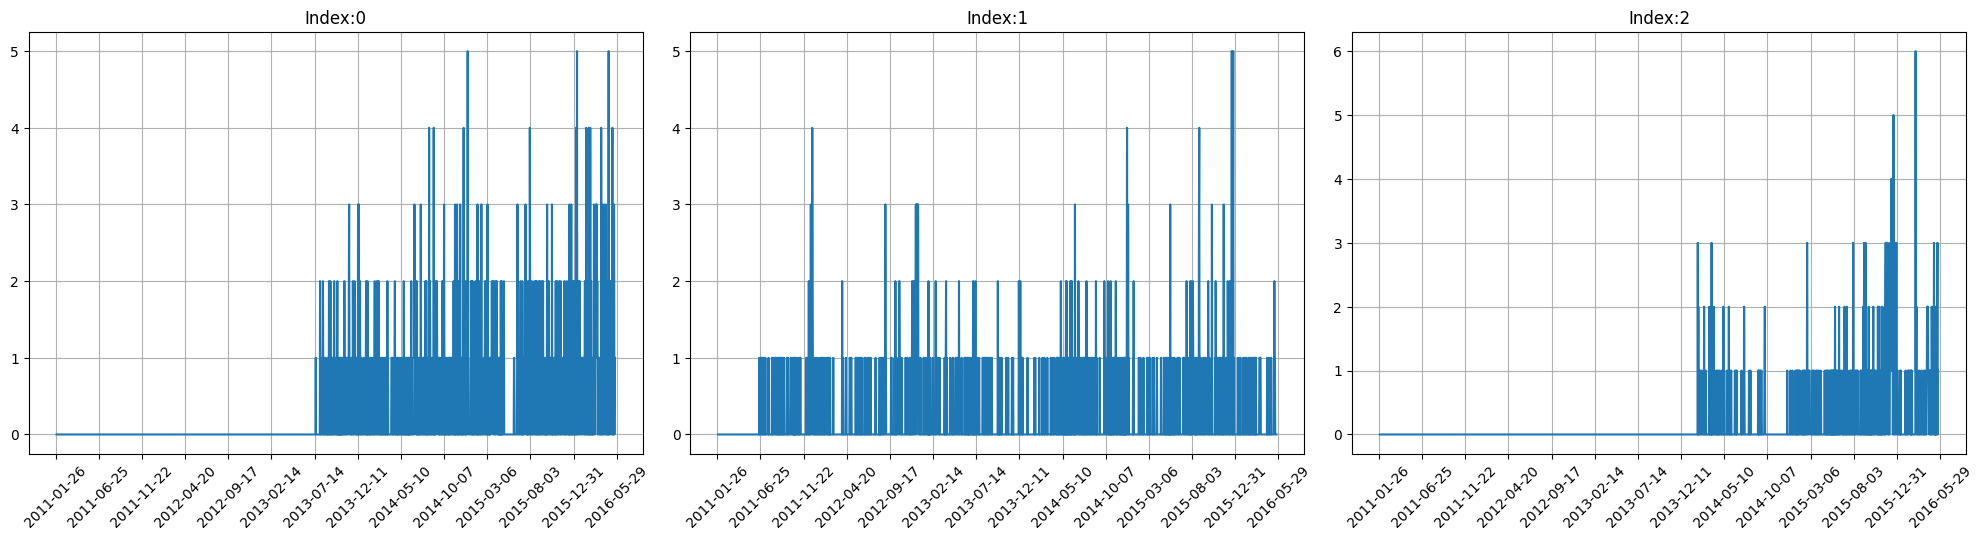

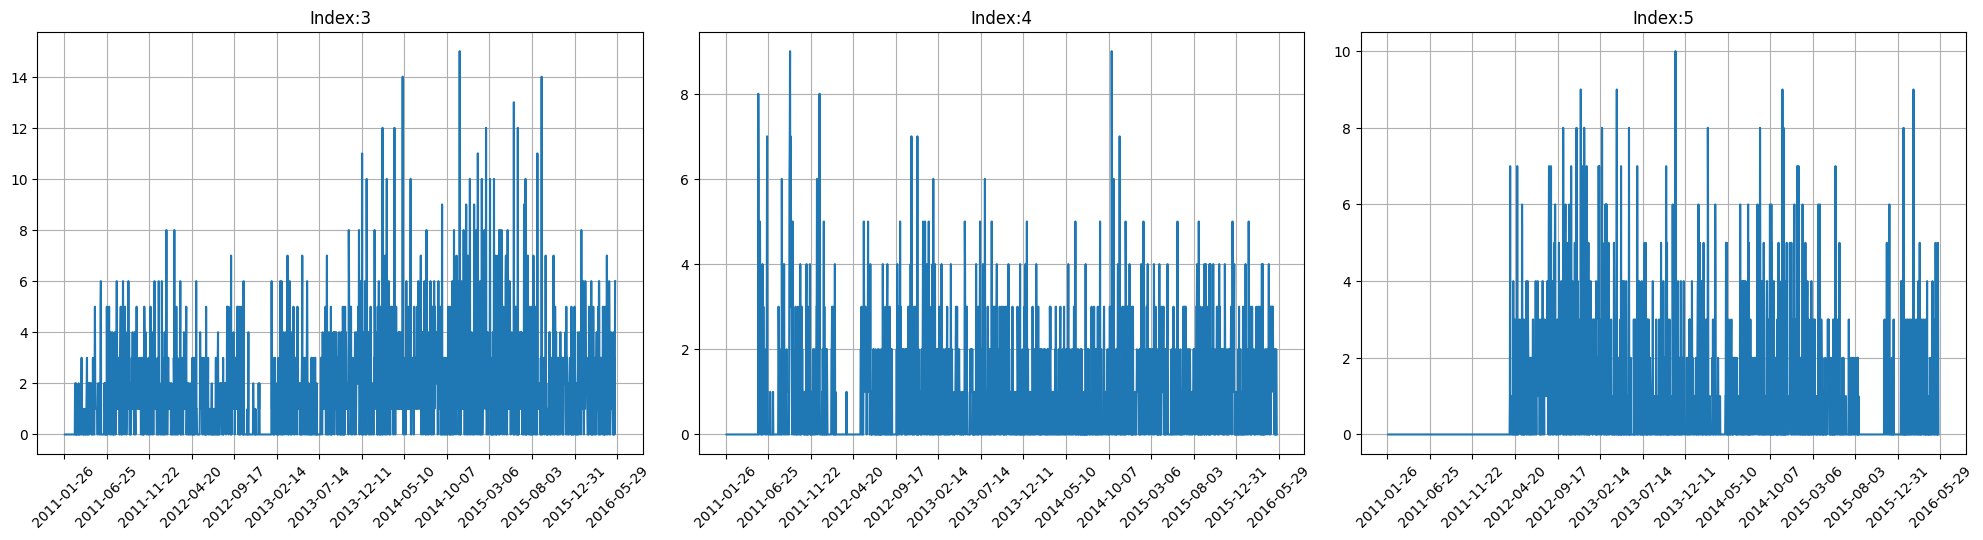

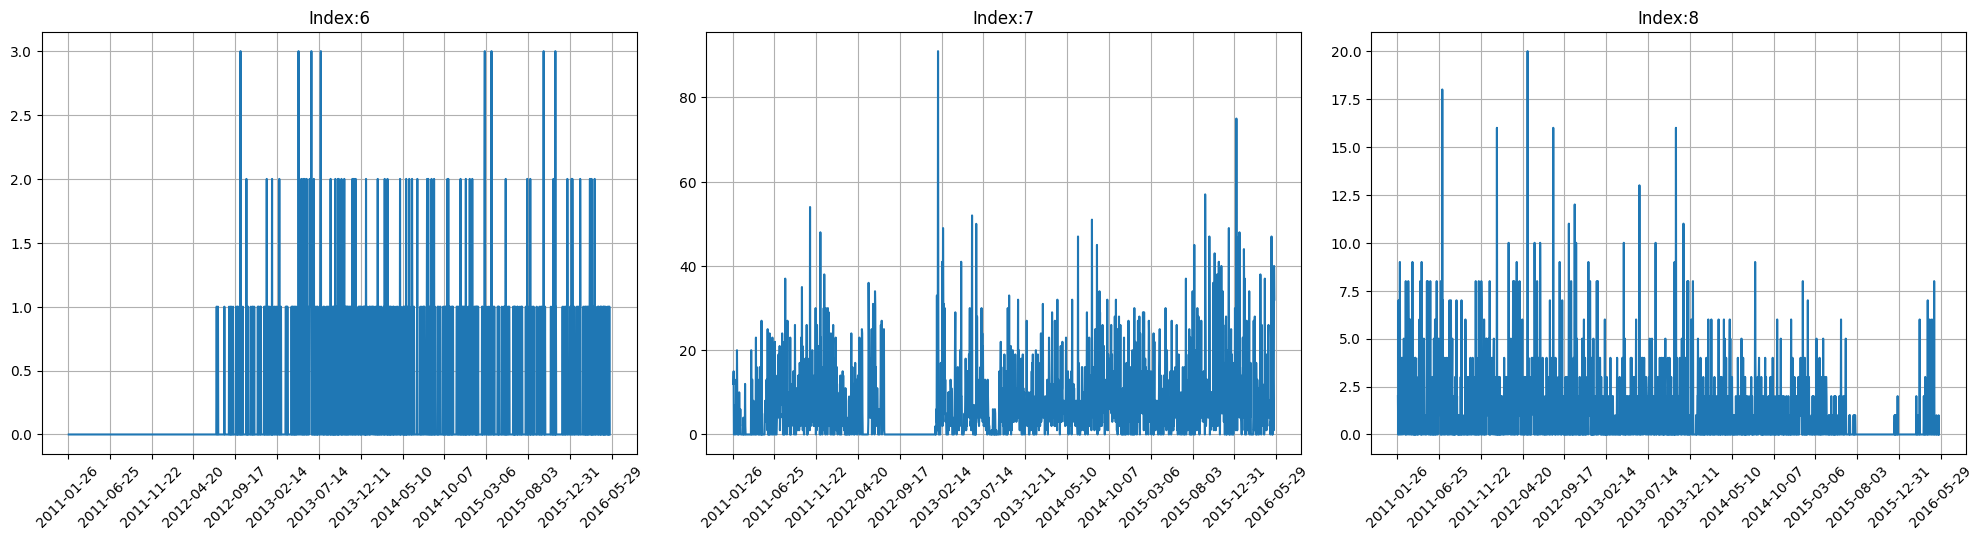

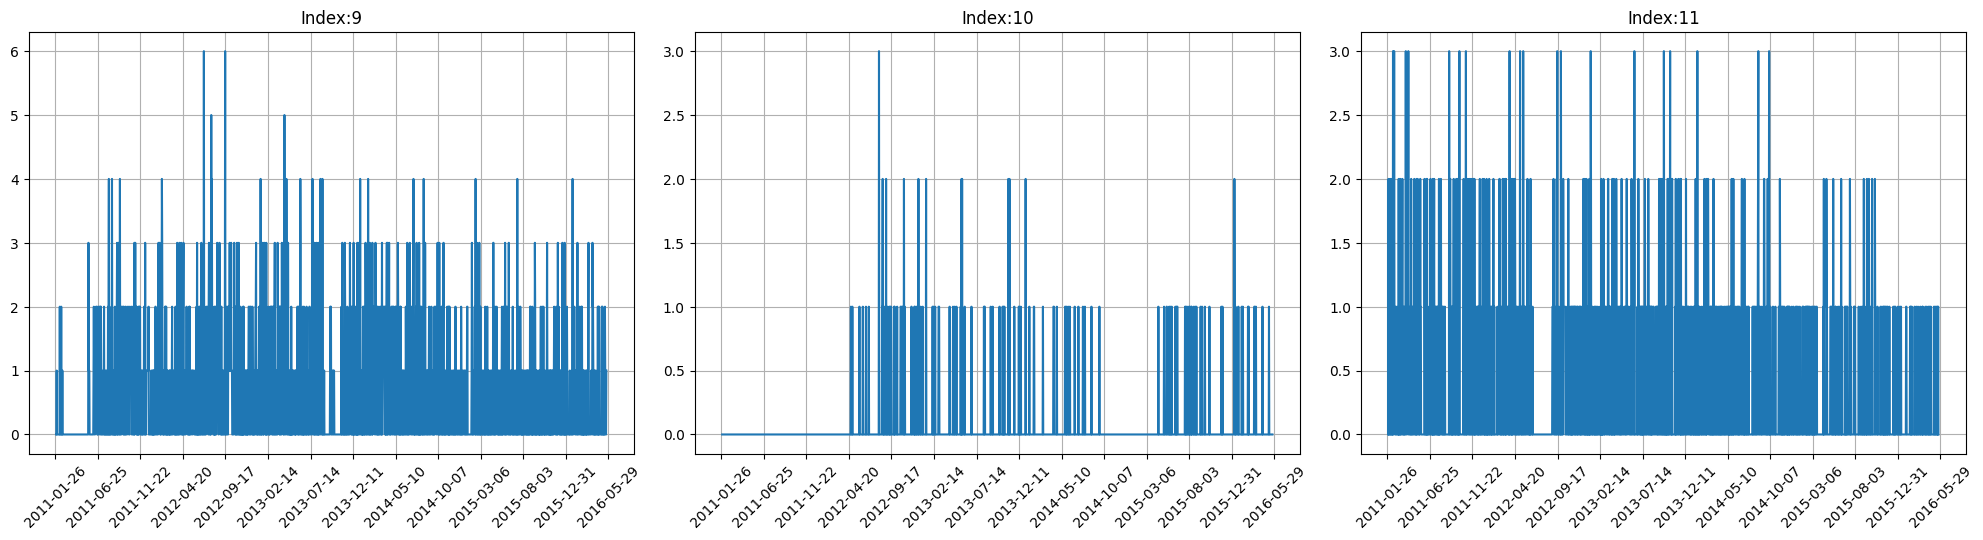

In [19]:
viz_series(bottom_level.values,dates_only, 12,3,  True, 100 )

This visualization shows sales patterns for individual items over time. It helps identify items with different sales behaviors, seasonality, or trends.

#### 2.2 Analyze sales per department and category

In [37]:
# Prepare data for department and category level analysis
dep_level = df.drop(['item_id','store_id','state_id','id'], axis=1).set_index(['dept_id', 'cat_id'])
dep_level.columns = dates_only
dep_level = dep_level.reset_index().groupby(['dept_id', 'cat_id']).sum()

dep_level.head()

,,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
dept_id,cat_id,,,,,,,,,,,,,,,,,,,,,
FOODS_1,FOODS,2343,2216,1657,1508,1209,1897,1903,2235,1925,1586,...,4130,4257,4225,3264,3119,3073,3251,3735,4195,4031
FOODS_2,FOODS,4094,4209,3174,3606,2869,4375,3349,4384,4273,3684,...,5842,7563,9069,6226,5311,4648,4551,4815,5940,6535
FOODS_3,FOODS,16741,16333,12343,13764,10525,15821,15238,21132,18664,13631,...,20135,24756,28153,19668,17718,17069,16935,19586,23464,25401
HOBBIES_1,HOBBIES,3610,3172,2497,2531,1714,3133,2855,3831,2741,2514,...,3422,4414,4464,3109,3142,3291,3027,3761,4832,4720
HOBBIES_2,HOBBIES,154,185,185,138,100,87,89,155,158,101,...,449,479,552,419,487,449,448,382,501,560


In [21]:
periods = int(math.ceil(len(dates)/100))
dep_level = dep_level.reset_index()
cat = dep_level.drop('dept_id', axis = 1).groupby('cat_id').sum()

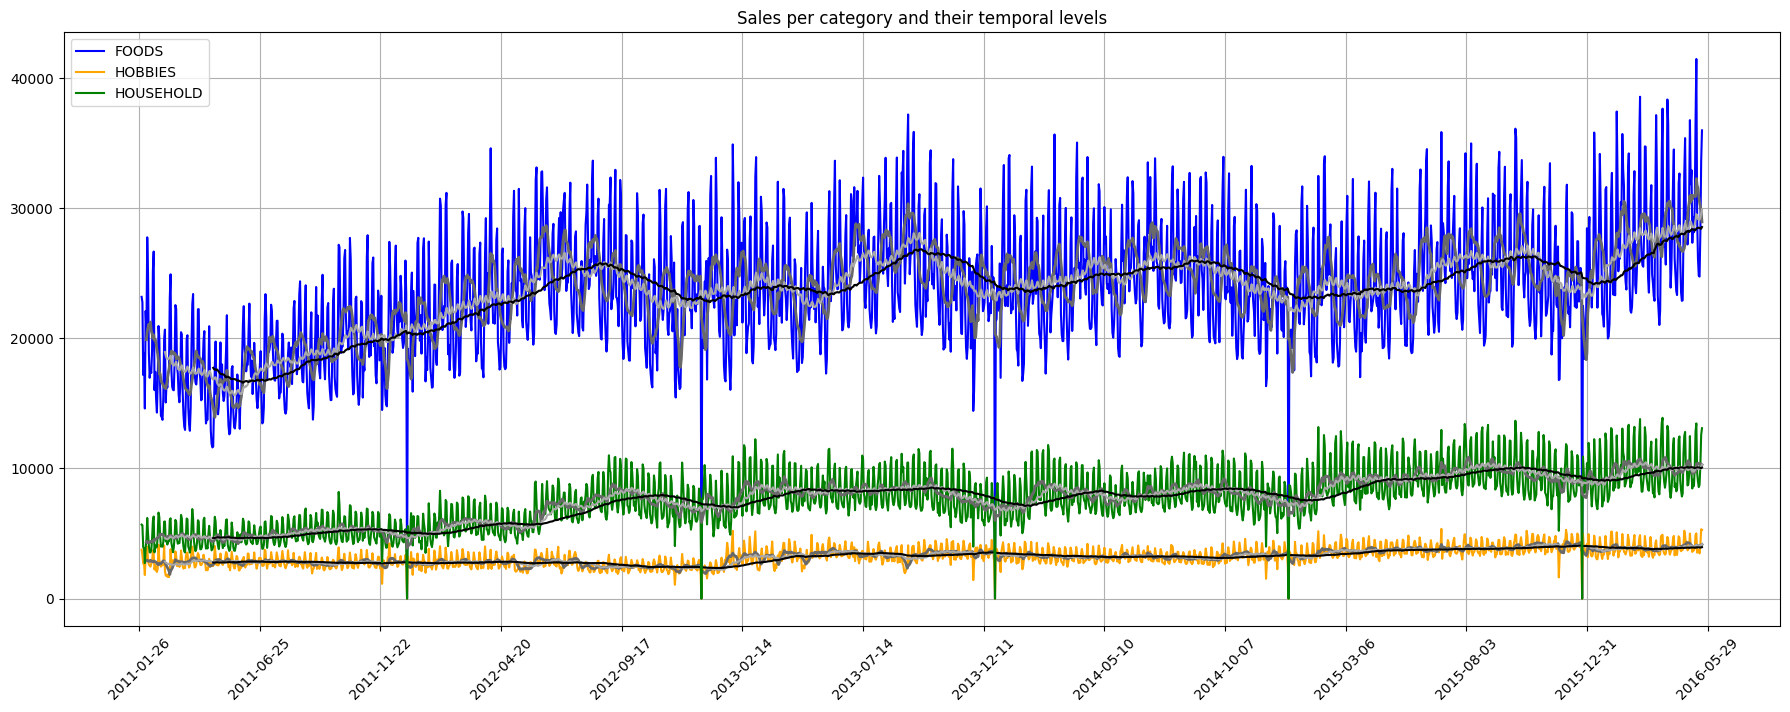

In [22]:
def moving_average(values, window):
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(1,1,1)


categories = cat.index.values

colors = ['blue','orange','green']
color_dict = dict(zip(categories,colors))


for category in categories:
    y = cat.loc[category].values
    ma_weekly = moving_average(y, 7) 
    ma_weekly = np.pad(ma_weekly, pad_width = (6, 0), constant_values = None)
    ma_monthly = moving_average(y, 30) 
    ma_monthly = np.pad(ma_monthly, pad_width = (29, 0), constant_values = None)
    ma_quarterly = moving_average(y, 90) 
    ma_quarterly = np.pad(ma_quarterly, pad_width = (89, 0), constant_values = None)

    s1mask = np.isfinite(ma_weekly)
    s2mask = np.isfinite(ma_monthly)
    s3mask = np.isfinite(ma_quarterly)

    plt.plot(dates_only,y, label = category, color = color_dict[category])
    
    plt.plot(dates_only[s1mask],ma_weekly[s1mask], color = 'dimgray',linewidth = 2)
    plt.plot(dates_only[s2mask],ma_monthly[s2mask], color = 'darkgray')
    plt.plot(dates_only[s3mask],ma_quarterly[s3mask], color = 'k')
plt.xticks(rotation = 45)
plt.grid()
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(periods))
plt.gcf().tight_layout()
plt.title('Sales per category and their temporal levels')
plt.show()

This plot shows sales trends for each product category, along with weekly, monthly, and quarterly moving averages. It helps identify which categories are performing better 
and how their sales patterns differ.

Food items have the most sales

Maybe due to having more items?

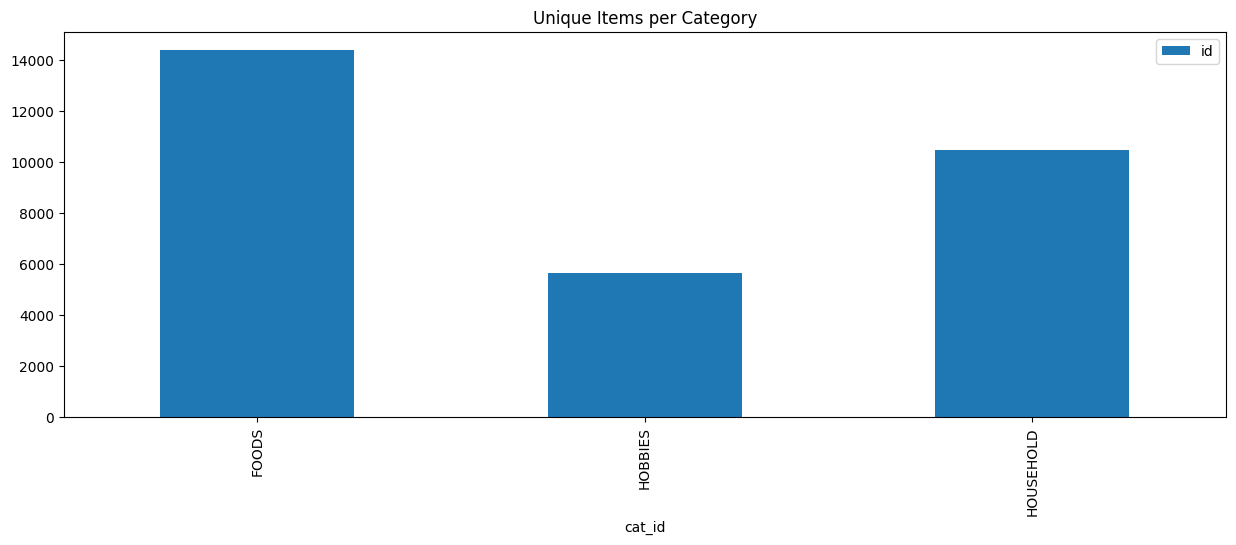

In [23]:
# Unique items per category
unique_per_cat = df.groupby('cat_id').agg({'id':'nunique'}).plot(kind = 'bar', figsize = (15,5), title = 'Unique Items per Category')

This bar chart shows the number of unique items in each product category. It helps understand if sales differences between categories might be due to the number of items available in each category.

In [24]:
periods = int(math.ceil(len(dates)/100))
dep = dep_level.drop('cat_id', axis = 1).groupby('dept_id').sum()

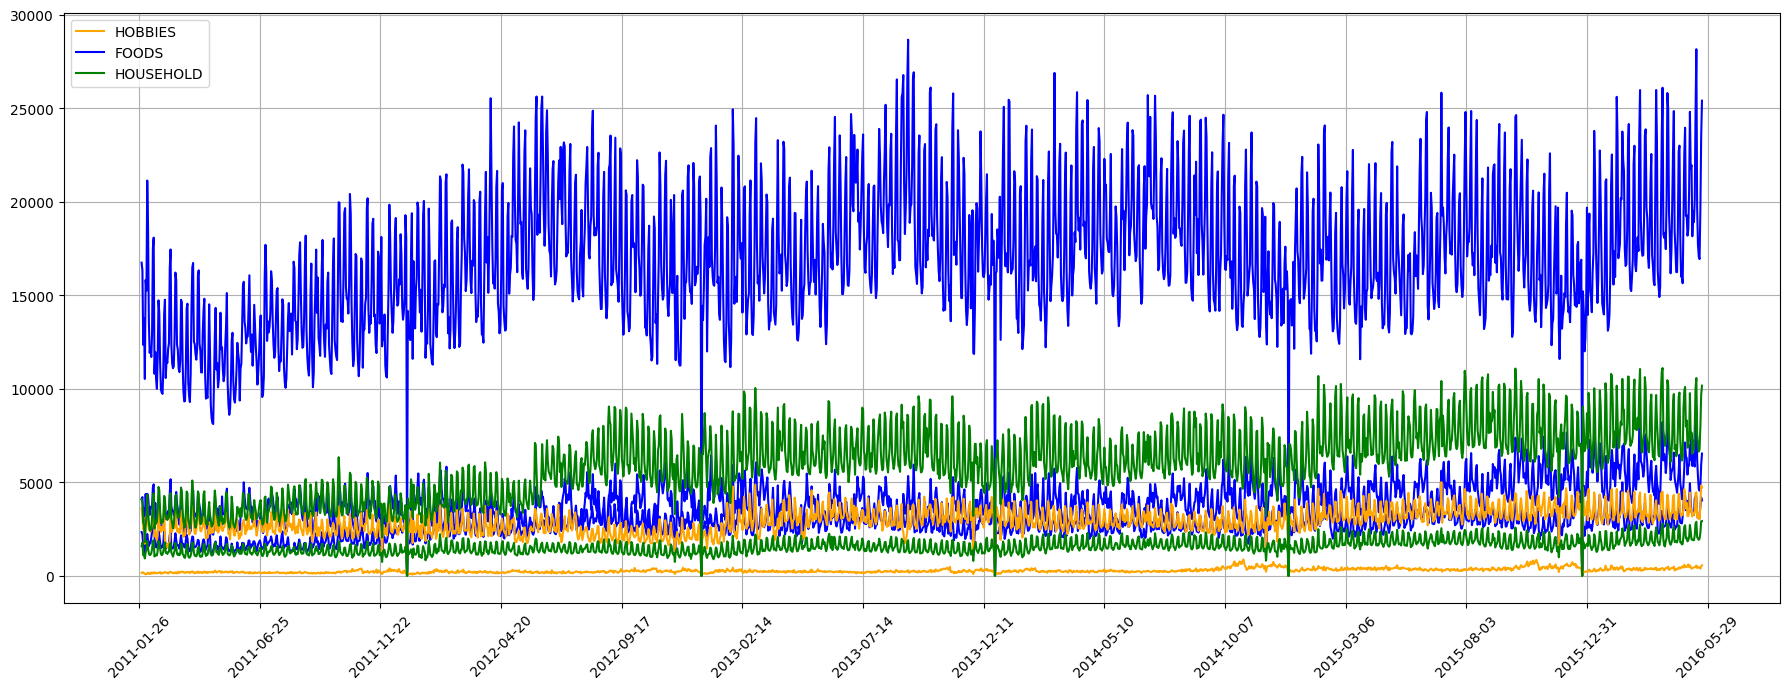

In [25]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = list(set(labels))
    unique_handles = [handles[labels.index(label)] for label in unique_labels]
    ax.legend(unique_handles, unique_labels)

fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(1,1,1)

deps = dep.index.values

for dep_ in deps:
    cat_ = dep_.split('_')[0]
    y = dep.loc[dep_].values
    plt.plot(dates_only,y, label = cat_, color = color_dict[cat_])

plt.xticks(rotation = 45)
plt.grid()
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(periods))
plt.gcf().tight_layout()
legend_without_duplicate_labels(ax)
plt.show()

#### 2.4 Analyze sales per store

In [38]:
# Plotting some unique time series
# Prepare data for store-level analysis
store_level = df.drop(['item_id','dept_id','state_id','id','cat_id'], axis=1).set_index(['store_id'])
store_level.columns = dates_only
store_level = store_level.reset_index().groupby('store_id').sum()

store_level.head()

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,4337,4155,2816,3051,2630,3276,3450,5437,4340,3157,...,4951,6245,6707,4568,3949,3995,4136,4433,5764,6289
CA_2,3494,3046,2121,2324,1942,2288,2629,3729,2957,2218,...,4839,6507,6710,4238,3963,3789,4037,4751,7120,6614
CA_3,4739,4827,3785,4232,3817,4369,4703,5456,5581,4912,...,6046,7029,7969,5891,5523,5375,5580,5542,7073,8144
CA_4,1625,1777,1386,1440,1536,1389,1469,1988,1818,1535,...,2635,3256,3318,3024,2715,2519,2544,2704,3146,3597
TX_1,2556,2687,1822,2258,1694,2734,1691,2820,2887,2174,...,3610,3787,5000,3708,3310,3147,2748,3664,4167,4624


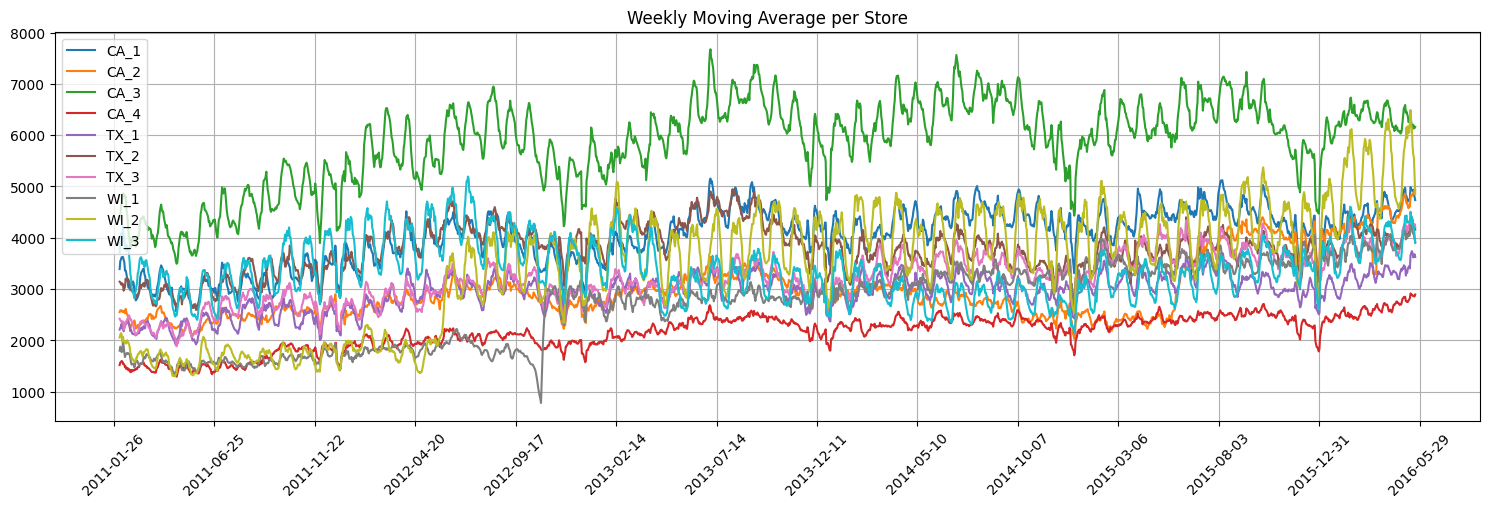

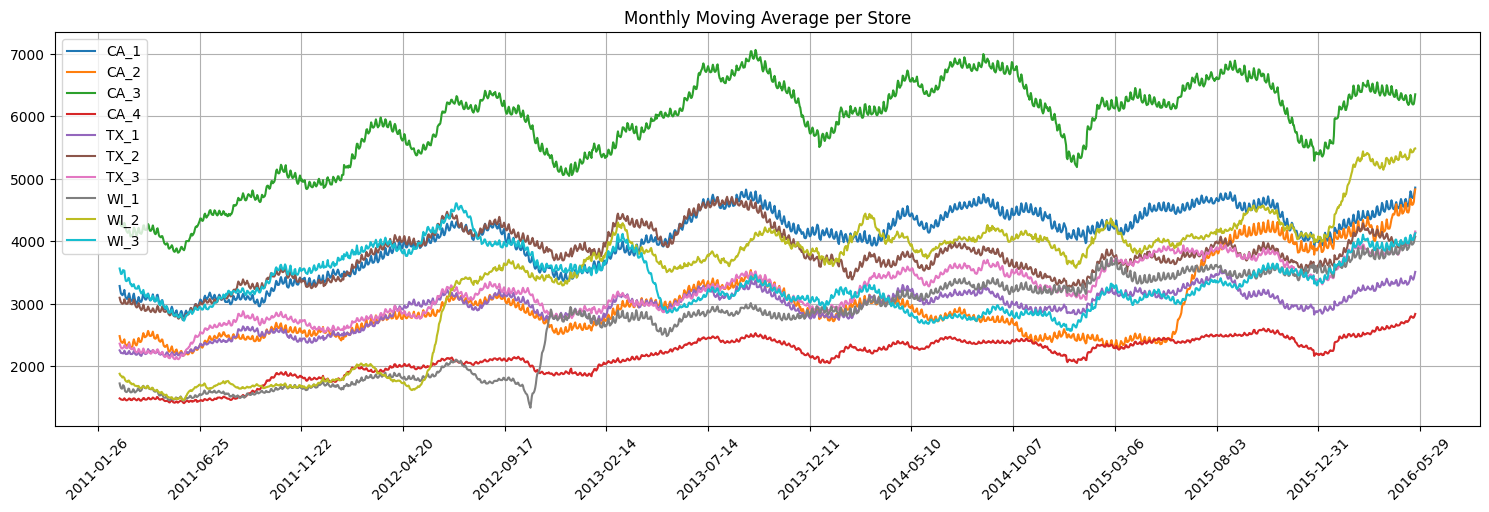

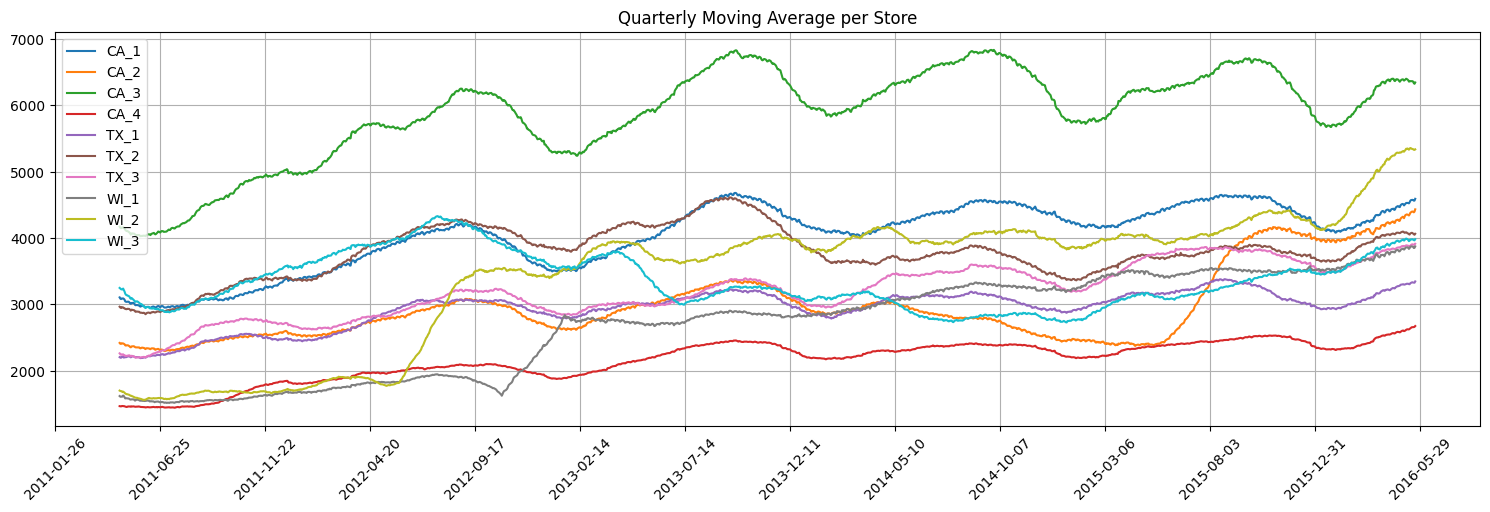

In [27]:
stores = store_level.index.values

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

for store in stores:
    y = store_level.loc[store].values
    ma_weekly = moving_average(y,7)
    ma_weekly = np.pad(ma_weekly, pad_width = (6, 0), constant_values = None)
    s1mask = np.isfinite(ma_weekly)
    plt.plot(dates_only[s1mask],ma_weekly[s1mask], label = store)

plt.xticks(rotation = 45)
plt.grid()
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(periods))
plt.gcf().tight_layout()
plt.title('Weekly Moving Average per Store')
plt.show()


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

for store in stores:
    y = store_level.loc[store].values
    ma_monthly = moving_average(y,30)
    ma_monthly = np.pad(ma_monthly, pad_width = (29, 0), constant_values = None)
    s1mask = np.isfinite(ma_monthly)
    plt.plot(dates_only[s1mask],ma_monthly[s1mask], label = store)

plt.xticks(rotation = 45)
plt.grid()
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(periods))
plt.gcf().tight_layout()
plt.title('Monthly Moving Average per Store')
plt.show()


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

for store in stores:
    y = store_level.loc[store].values
    ma_quarterly = moving_average(y,90)
    ma_quarterly = np.pad(ma_quarterly, pad_width = (89, 0), constant_values = None)
    s1mask = np.isfinite(ma_quarterly)
    plt.plot(dates_only[s1mask],ma_quarterly[s1mask], label = store)

plt.xticks(rotation = 45)
plt.grid()
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(periods))
plt.gcf().tight_layout()
plt.title('Quarterly Moving Average per Store')
plt.show()

These plots show sales trends for each store using different moving average windows. They help identify which stores are performing better and how their sales patterns differ over various time frames.

#### 2.5 Analyze Seasonality Effects on Stores


In [30]:
# Prepare data for seasonality analysis
store_level_t = store_level.copy().reset_index()
store_level_t = pd.melt(store_level_t, value_vars=bottom_level.columns, var_name='date', value_name='y', id_vars='store_id')

features_df = create_features(store_level_t, 'transaction')
# Drop row with zero sales
features_df = features_df[features_df['y'] > 0]

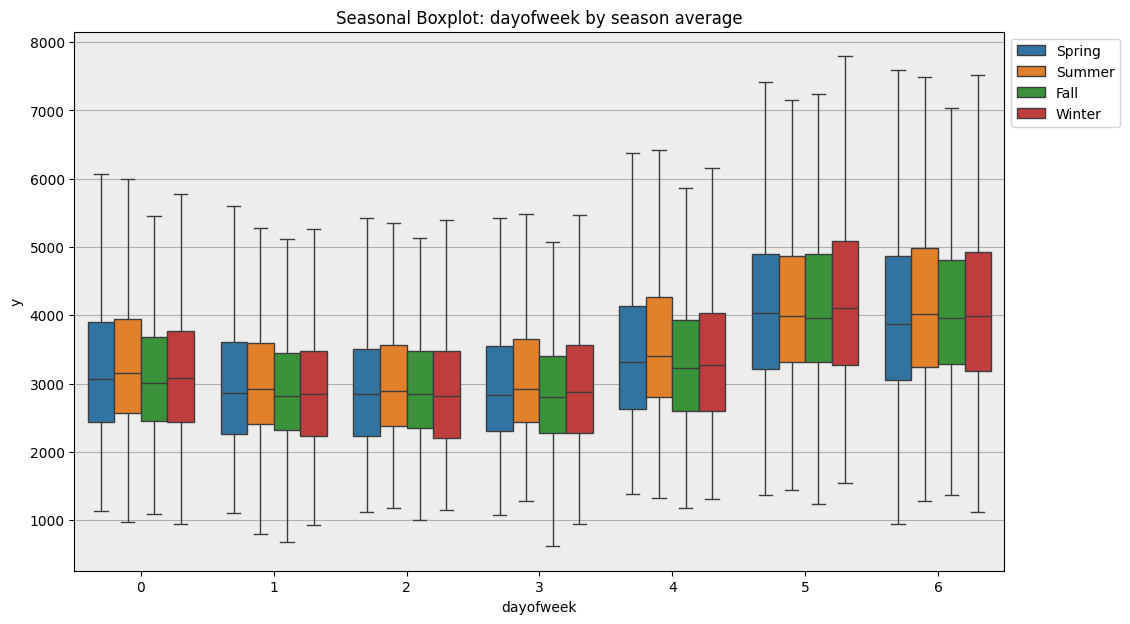

In [32]:
fig, ax = plt.subplots(figsize=(12, 7))
gray_scale = 0.93
x_axis, hue = ['dayofweek','season']
ax.set_facecolor((gray_scale, gray_scale, gray_scale))

sns.boxplot(
    data=features_df.dropna(), x=x_axis, y="y", hue=hue, ax=ax, showfliers=False, linewidth=1)


# Edit format
title = f"Seasonal Boxplot: {x_axis} by {hue} average"
ax.set_title(title)
ax.set_xlabel(x_axis)
ax.set_ylabel("y")
ax.grid(axis="y")
ax.legend(bbox_to_anchor=(1, 1))

plt.show()

This boxplot visualizes the seasonal patterns in sales across different days of the week. It helps identify how sales vary by day of the week and how this pattern changes across seasons.

In [33]:
from DeepRetail.transformations.formats import StandardScaler_custom


def calendar_heatmap(df, format, by):
    """
    Creates a heatmap representation of the data in a calendar format.
    Each year is being plotted in a separate subplot.

    Args:
    df (pandas DataFrame): The data frame to be plotted.
    format (str): The format of the calendar features to be added (eg. 'month_day', 'day_of_week').
    by (tuple of str): The columns to be used for the x and y axis of the heatmap.

    Returns:
    None. Plots the calendar heatmap representation of the data.
    """
    # Ensure columns are datetime
    df.columns = pd.to_datetime(df.columns.values)

    # Take the total years
    total_years = np.unique(df.columns.year)

    # Initialize the plot
    fig, axes = plt.subplots(
        nrows=len(total_years),
        ncols=1,
        squeeze=False,
        figsize=(16, len(total_years) * 3),
    )
    # Initialize the cbar
    cbar_ax = fig.add_axes([0.91, 0.3, 0.03, 0.4])
    gray_scale = 0.93

    # Unfold
    x_axis, y_axis = by

    # Itterate over plots
    for year, ax in zip(total_years, axes):
        # Filre columns on sample_df to keep only dates on the first year
        temp_df = df[df.columns[df.columns.year == year]]

        # Normalize all values into (-1,1) to have identical scales
        temp_df = pd.DataFrame(
            StandardScaler_custom(temp_df.values),
            index=temp_df.index,
            columns=temp_df.columns,
        )

        # Add the calendar features
        temp_df = create_features(temp_df, format=format)

        # Pivot
        temp_df = pd.pivot_table(
            temp_df, index=x_axis, values="y", columns=y_axis, aggfunc="mean"
        )

        # Add the plot
        sns.heatmap(
            temp_df,
            annot=False,
            cmap="seismic",
            linewidth=0.5,
            linecolor="white",
            cbar=False if year != total_years[-1] else True,
            cbar_ax=None if year != total_years[-1] else cbar_ax,
            ax=ax[0],
        )

        title = f"Year: {year}"
        ax[0].set_title(title, pad=20)

        ax[0].set_xlabel(y_axis, labelpad=30)
        ax[0].set_ylabel(x_axis, labelpad=30)
        ax[0].set_facecolor((gray_scale, gray_scale, gray_scale))

    fig.tight_layout(rect=[0, 0, 0.9, 1])
    fig.show()

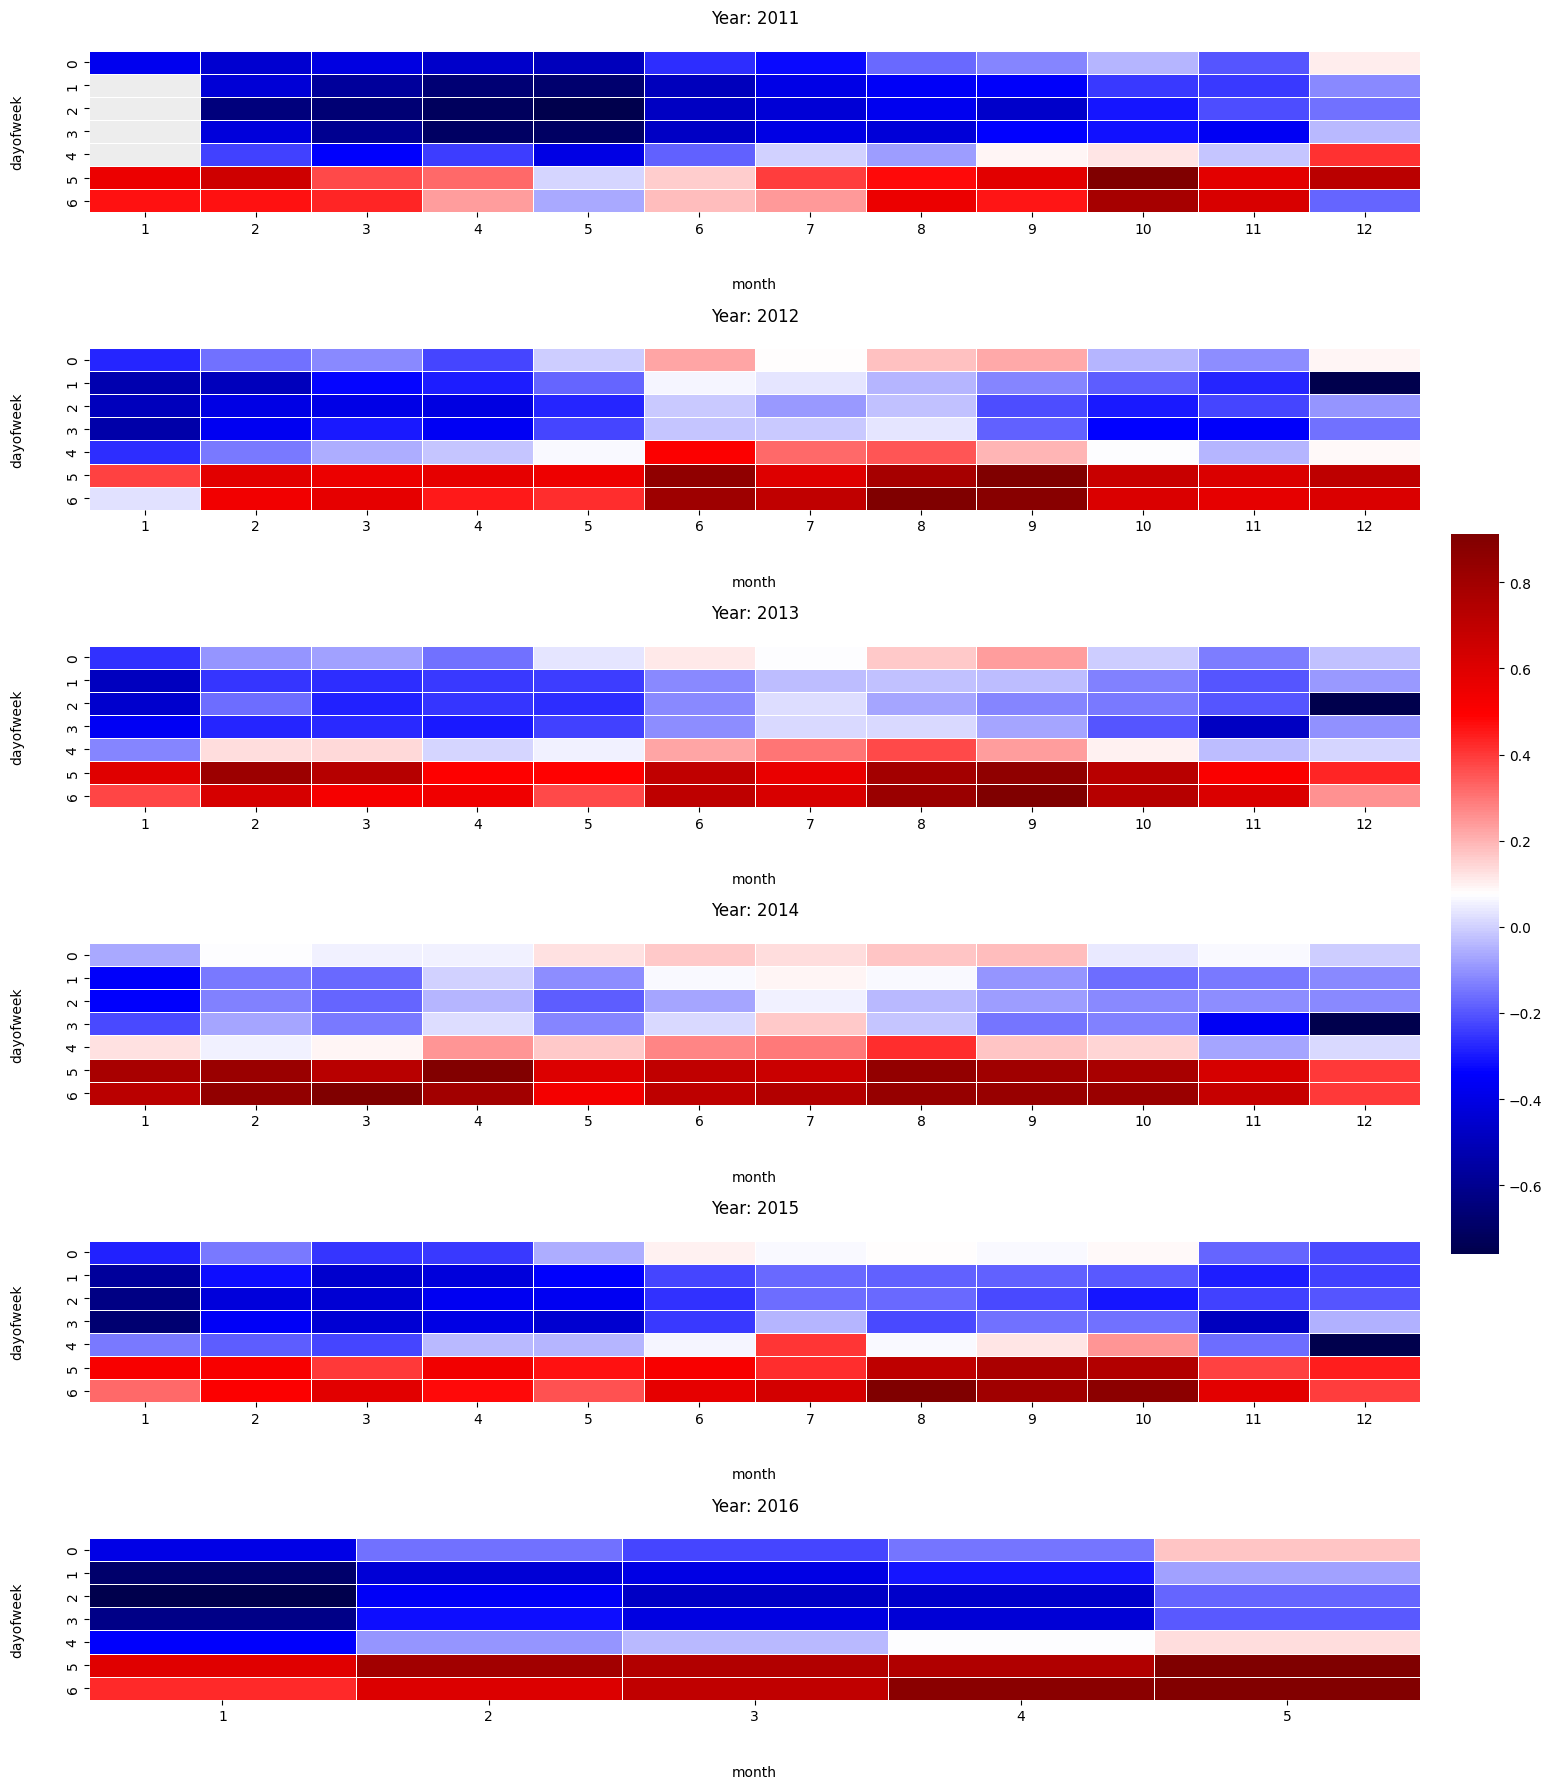

In [34]:
format = 'pivot'
by = ['dayofweek', 'month']

calendar_heatmap(store_level, format, by)

This heatmap provides a calendar view of sales patterns, showing how sales vary by day of the week and month across different years. It helps identify consistent seasonal patterns and any year-over-year changes in these patterns.